In [45]:
import numpy as np
from os.path import join

import healpy as hp
import scienceplots
import matplotlib.pyplot as plt


%matplotlib inline



# import healpy as hp
# import jax.numpy as jnp
# import matplotlib.pyplot as plt
# import numpy as np
# from corner import corner
# from h5py import File
# import harmonic as hm
# from jax import random
# from jax.lax import cond
# from numpyro import deterministic, factor, plate, sample
# from numpyro.distributions import ProjectedNormal, Uniform
# from numpyro.handlers import reparam
# from numpyro.infer import MCMC, NUTS, init_to_sample
# from numpyro.infer.reparam import ProjectedNormalReparam
# import scienceplots

### Load the JWST data

In [76]:
def read_latex_table(filename, spin):
    data = []
    with open(filename) as f:
        for lineno, line in enumerate(f):
            if not line.strip():
                continue

            if lineno == 0:
                continue

            line = line.replace('\\', '')
            parts = [p.strip() for p in line.split('&') if p.strip()]

            for i in range(0, len(parts), 3):
                if i + 2 >= len(parts):
                    continue

                try:
                    id_val = int(parts[i])
                    ra_val = float(parts[i+1])
                    dec_val = float(parts[i+2])
                    data.append((id_val, ra_val, dec_val, spin))
                except ValueError:
                    continue

    return data


def load_all_files(folder):
    files = [
        # ('clockwise_1.txt', 1),
        ('clockwise_2.txt', 1),
        # ('counterclockwise_1.txt', 0),
        ('counterclockwise_2.txt', 0),
    ]

    all_data = []
    for fname, spin in files:
        path = join(folder, fname)
        data = read_latex_table(path, spin)
        all_data.extend(data)

    dtype = np.dtype([('id', int), ('ra', float), ('dec', float), ('spin', int)])
    return np.array(all_data, dtype=dtype)



In [77]:
folder = "/Users/rstiskalek/Projects/Data/JWST_spins_Shamir/"
catalog = load_all_files(folder)


print(f"Loaded {len(catalog)} entries from catalog.")
print(f"The mean spin is {np.mean(catalog['spin'])}.")

Loaded 82 entries from catalog.
The mean spin is 0.6463414634146342.


In [78]:
from scipy.special import comb
from scipy.integrate import simpson


n = len(catalog)
k = np.sum(catalog['spin'] == 1)


def log_pdf(M):
    return np.log(comb(n, k)) + k * np.log(M) + (n - k) * np.log(1 - M)

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_41881/3263720629.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(comb(n, k)) + k * np.log(M) + (n - k) * np.log(1 - M)


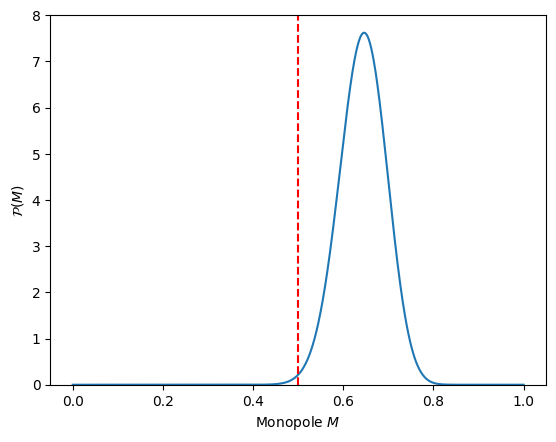

In [79]:
x = np.linspace(0, 1, 1000)
y = log_pdf(x)
y -= np.log(simpson(np.exp(y), x))  # Normalize the log PDF

plt.figure()
plt.plot(x, np.exp(y), label='Log PDF')
plt.axvline(x=0.5, color='red', linestyle='--', label='M = 0.5')
plt.ylim(0)
plt.xlabel(r"Monopole $M$")
plt.ylabel(r"$\mathcal{P}(M)$")
plt.savefig("jwst_spin_mono.png", bbox_inches='tight', dpi=450)
plt.show()
